<a href="https://colab.research.google.com/github/adi1970/CODSOFT/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREDIT CARD FRAUD DETECTION
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under thePrecision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

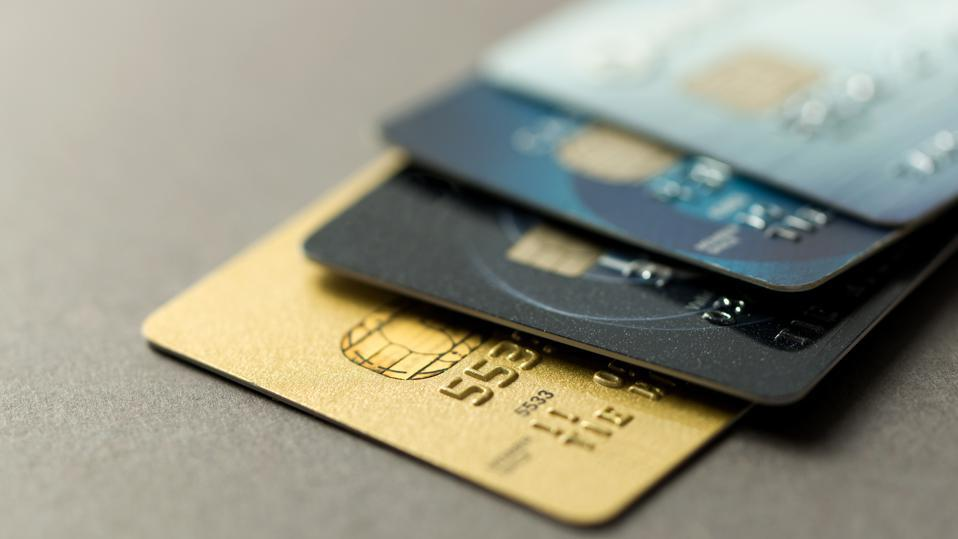

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 74% 49.0M/66.0M [00:00<00:00, 233MB/s]
100% 66.0M/66.0M [00:00<00:00, 210MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/creditcardfraud.zip','r')
zip_ref.extractall('/content')
zip_ref.close()


**Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

**Importing the dataset**

In [ ]:
df=pd.read_csv('/content/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
x=df.iloc[:,:-1].values # Independent variable

y=df.iloc[:,-1].values # Dependent variables

Spliting the dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
print(x)
print(y)

[[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ... -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ... -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]
 ...
 [ 1.72788000e+05  1.91956501e+00 -3.01253846e-01 ...  4.45477214e-03
  -2.65608286e-02  6.78800000e+01]
 [ 1.72788000e+05 -2.40440050e-01  5.30482513e-01 ...  1.08820735e-01
   1.04532821e-01  1.00000000e+01]
 [ 1.72792000e+05 -5.33412522e-01 -1.89733337e-01 ... -2.41530880e-03
   1.36489143e-02  2.17000000e+02]]
[0 0 0 ... 0 0 0]


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred=classifier.predict(x_test)
print("Predicted values:")
print(y_pred)

Predicted values:
[0 0 0 ... 0 0 0]


In [ ]:
import sklearn.metrics as metrics
print("Accuracy",metrics.accuracy_score(y_test,y_pred)*100)

Accuracy 99.91105181231933


In [ ]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[85281    27]
 [   49    86]]


In [ ]:
print("Report: \n" ,classification_report(y_test, y_pred))

Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.76      0.64      0.69       135

    accuracy                           1.00     85443
   macro avg       0.88      0.82      0.85     85443
weighted avg       1.00      1.00      1.00     85443



Predicting the Card Fraud Using random value

In [ ]:
xrandom = [[0,
-1.3598071336738,
-0.0727811733098497,
2.53634673796914,
1.37815522427443,
-0.338320769942518,
0.462387777762292,
0.239598554061257,
0.0986979012610507,
0.363786969611213,
0.0907941719789316,
-0.551599533260813,
-0.617800855762348,
-0.991389847235408,
-0.311169353699879,
1.46817697209427,
-0.470400525259478,
0.207971241929242,
0.0257905801985591,
0.403992960255733,
0.251412098239705,
-0.018306777944153,
0.277837575558899,
-0.110473910188767,
0.0669280749146731,
0.128539358273528,
-0.189114843888824,
0.133558376740387,
-0.0210530534538215,
149.62]]

y_pred4 = classifier.predict(xrandom)

print(y_pred4)

[0]


**Random Forest Classsifier**


In [ ]:

from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100) # 100 trees

clf.fit(x_train,y_train)

y_pred1=clf.predict(x_test)
print(y_pred1)

[0 0 0 ... 0 0 0]


In [ ]:
print("Accuracy:",accuracy_score(y_test,y_pred1))

Accuracy: 0.9995084442259752


Predicting the Card Fraud Using random value

In [ ]:
clf.predict([[0,
-1.3598071336738,
-0.0727811733098497,
2.53634673796914,
1.37815522427443,
-0.338320769942518,
0.462387777762292,
0.239598554061257,
0.0986979012610507,
0.363786969611213,
0.0907941719789316,
-0.551599533260813,
-0.617800855762348,
-0.991389847235408,
-0.311169353699879,
1.46817697209427,
-0.470400525259478,
0.207971241929242,
0.0257905801985591,
0.403992960255733,
0.251412098239705,
-0.018306777944153,
0.277837575558899,
-0.110473910188767,
0.0669280749146731,
0.128539358273528,
-0.189114843888824,
0.133558376740387,
-0.0210530534538215,
149.62]])

array([0])

In [ ]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred1))

Confusion Matrix: 
 [[85296    12]
 [   30   105]]


In [ ]:
print("Report: \n" ,classification_report(y_test, y_pred1))

Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.90      0.78      0.83       135

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

